✅ Libraries imported successfully!
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== 

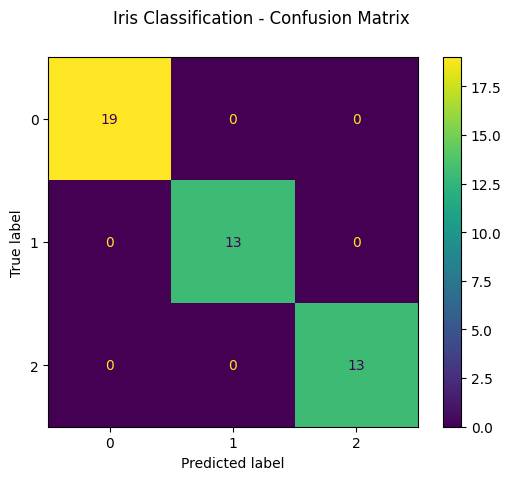

MAE: 0.5272474538305952
MSE: 0.5305677824766752
R² Score: 0.5957702326061665


In [6]:
# Foundational Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics

print("✅ Libraries imported successfully!")

# Load the Iris dataset
iris = datasets.load_iris()

# See what's inside
print(iris.DESCR)

# Create DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Quick look
print(iris_df.head())
print("\nLabel distribution:")
print(iris_df['target'].value_counts())

# Features (X) and labels (y)
X = iris.data
y = iris.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Model
model = LogisticRegression(max_iter=200)

# 2. Train
model.fit(X_train_scaled, y_train)

# 3. Predict
y_pred = model.predict(X_test_scaled)

# 4. Evaluate
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

# Confusion matrix visualization
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Iris Classification - Confusion Matrix")
plt.show()

# Load dataset
housing = datasets.fetch_california_housing()

X_reg = housing.data
y_reg = housing.target

# Split and scale
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Train Linear Regression
reg_model = LinearRegression()
reg_model.fit(X_train_reg_scaled, y_train_reg)

# Predict
y_pred_reg = reg_model.predict(X_test_reg_scaled)

# Evaluate
print('MAE:', metrics.mean_absolute_error(y_test_reg, y_pred_reg))
print('MSE:', metrics.mean_squared_error(y_test_reg, y_pred_reg))
print('R² Score:', metrics.r2_score(y_test_reg, y_pred_reg))
